In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [80]:
last_layers.keys()

dict_keys(['70m', '410m', '1b', '1.4b', '2.8b'])

In [ ]:
# Looking at the last layer representation for each model sizes

In [65]:
corr_result=pd.read_csv('task_id_corr.csv')
last_layers = {}
for model_size in corr_result['model_size'].unique():
    last_layer = corr_result[corr_result['model_size']==model_size]['layer_num'].max()
    last_layers[model_size] = last_layer

plot_result = {'corrcoef':[], 'model_size': [], 'task': []}
for i, (m,l) in enumerate(last_layers.items()):
    cond = (~corr_result['task'].str.contains('crows')) & (~corr_result['task'].str.contains('wsc')) \
        & (~corr_result['task'].str.contains('hendrycks')) \
            & (corr_result['model_size'] == m) \
        & (corr_result['n_words_correlated']==1) \
            & (corr_result['method']=='mle') \
                & (corr_result['layer_num']==l)
    plot_result['corrcoef'].extend(list(corr_result[cond]['corrcoef'].values))
    plot_result['model_size'].extend(list(corr_result[cond]['model_size'].values))
    plot_result['task'].extend([t.split('-')[0] for t in list(corr_result[cond]['task'].values)])

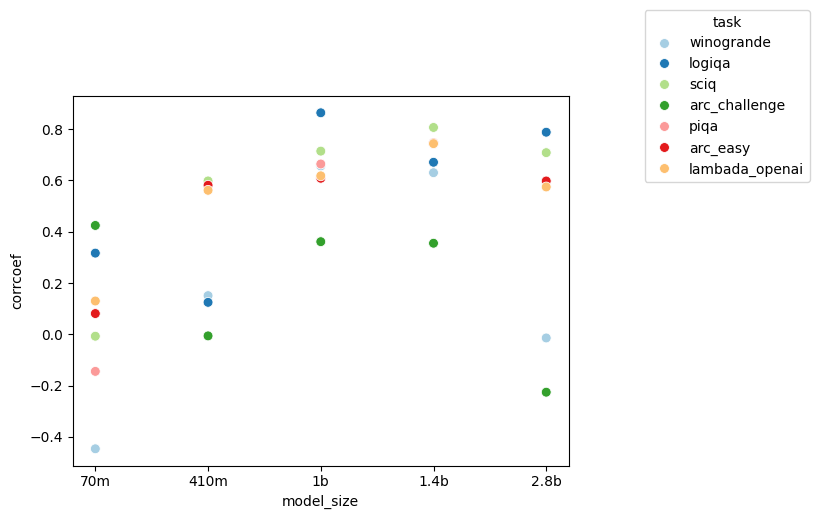

In [66]:
ax= sns.scatterplot(plot_result, x = 'model_size', y = 'corrcoef', hue='task', palette = 'Paired', s=50, )
sns.move_legend(ax, loc = 'center right', bbox_to_anchor=(1.5, 1))

In [75]:
## Fix the model size and plot over layer

last_layers = {}
for model_size in corr_result['model_size'].unique():
    last_layer = corr_result[corr_result['model_size']==model_size]['layer_num'].max()
    last_layers[model_size] = last_layer

plot_result = {m: {'corrcoef':[], 'task': [], 'layer_num': []} for m in last_layers.keys()}
for i, (m,l) in enumerate(last_layers.items()):
    cond = (~corr_result['task'].str.contains('crows')) & (~corr_result['task'].str.contains('wsc')) \
        & (~corr_result['task'].str.contains('hendrycks')) \
            & (corr_result['model_size'] == m) \
        & (corr_result['n_words_correlated']==1) \
            & (corr_result['method']=='mle')
    plot_result[m]['corrcoef'].extend(list(corr_result[cond]['corrcoef'].values))
    plot_result[m]['layer_num'].extend(list(corr_result[cond]['layer_num'].values))
    plot_result[m]['task'].extend([t.split('-')[0] for t in list(corr_result[cond]['task'].values)])

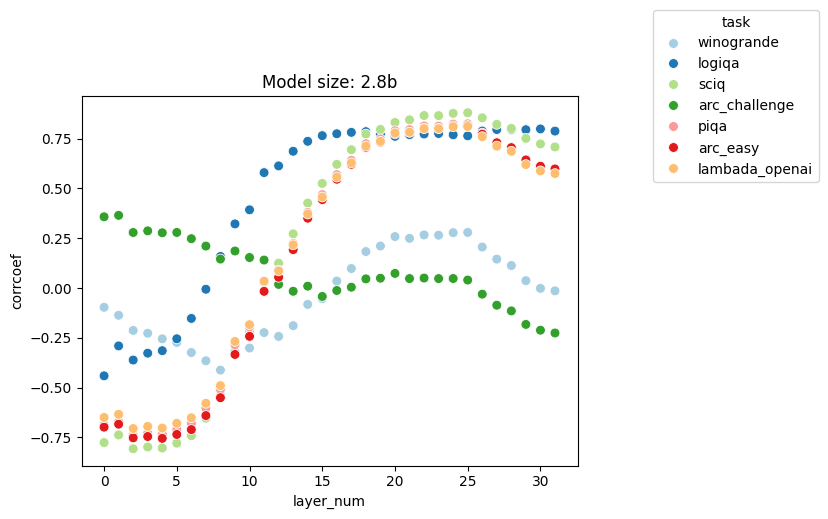

In [77]:
m = '2.8b'
ax= sns.scatterplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', palette = 'Paired', s=50, )
ax.set_title(f'Model size: {m}')
sns.move_legend(ax, loc = 'center right', bbox_to_anchor=(1.5, 1))

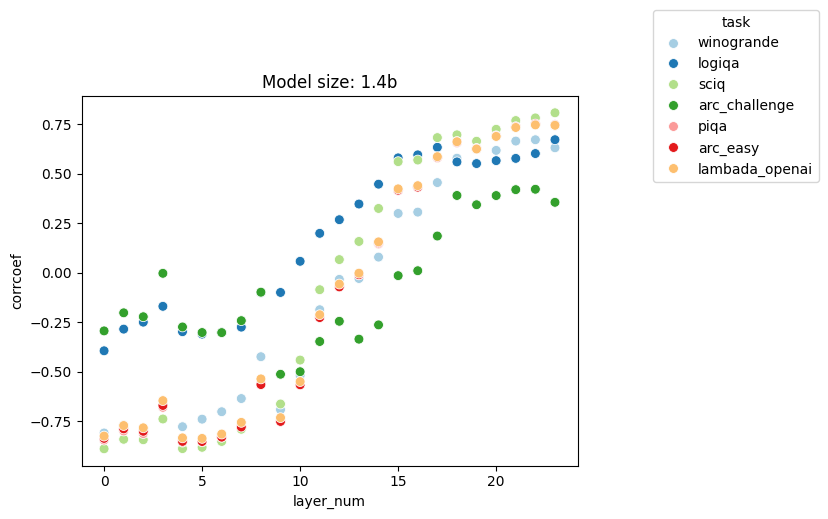

In [81]:
m = '1.4b'
ax= sns.scatterplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', palette = 'Paired', s=50, )
ax.set_title(f'Model size: {m}')
sns.move_legend(ax, loc = 'center right', bbox_to_anchor=(1.5, 1))

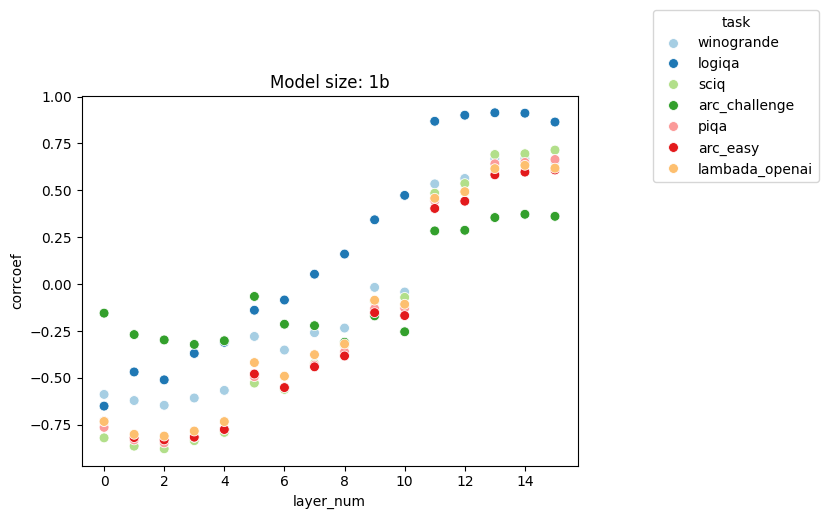

In [82]:
m = '1b'
ax= sns.scatterplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', palette = 'Paired', s=50, )
ax.set_title(f'Model size: {m}')
sns.move_legend(ax, loc = 'center right', bbox_to_anchor=(1.5, 1))

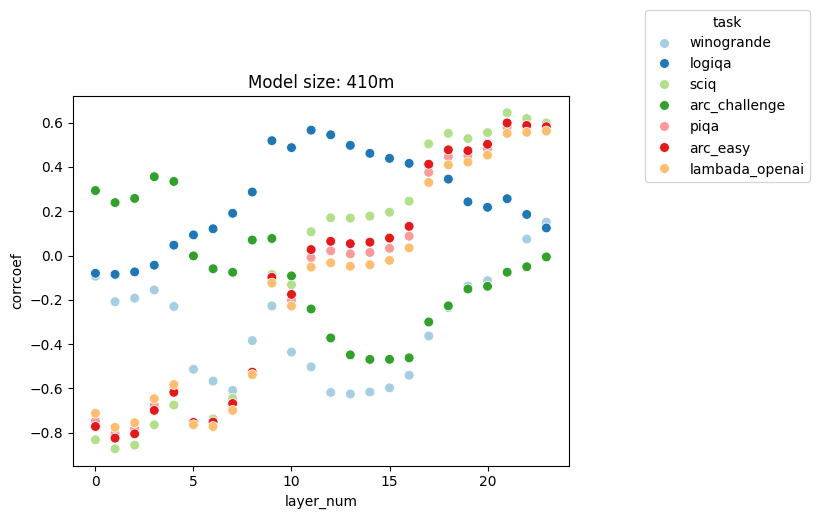

In [85]:
m = '410m'
ax= sns.scatterplot(plot_result[m], x = 'layer_num', y = 'corrcoef', hue='task', palette = 'Paired', s=50, )
ax.set_title(f'Model size: {m}')
sns.move_legend(ax, loc = 'center right', bbox_to_anchor=(1.5, 1))